<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/computer_vision_and_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## what is a computer vision problem
a computer vision problem invovles developing algorithms and models that enable computer to nterapret, analyze and understand visula dat from the world, such as image and videos. these problems often involves taks that mimic human visua perception and processing .

#### common computer vison problems

* image classificaion
* object detection
* segmentaion
* image generation
* facial recognition
* object tracking
* pose estimatin
* optical character recognition
* image restoration
* actin recognition
* anomaly detection in visual data
and many more


### inputs and outputs of a computer vision problem

it depends on the specific task being solved

inputs :
image data:
  - single image
  - image sequences ( videos)
  - 3D data
metadata
pre labled data


outputs:

the output are task specific and represetn the desired interpretaio or decsion based on the input data . common outputs include:

1. for image classficaion:
  - a single lable ( eg cat) or multiple lables
2. for object detection:
  - bounding boxes : coordinates aroud detected objects
  - class lables: lable for each detected object
  - confidence scores: a probability indicating the certaintly of the detection

3. for image segmentaion:
  - semantic segmetnation: a mask where each pixel has a class lable( eg sky )
  - instance segmentaion: a mask for each object intance , separitng ovelapping objects
and many more

these mappings ensure computers can precess visual inforation and return actinable insights


in computer vsion ( and deep learning in general) , batch size refers to the number of samples ( images in the case of coputer vision ) processed together in one forward and backward pass through the neural network . it plays a critical rele in traing deep learingmodels and influences several spacests of the process:


key points about batch_size:

1. fowrad pass and backward pass:
  - during the forward pass, the neural network computers predictions for all image in the batch.
  - in the backward pass , gradietns are computed for the loss assocaited with the batch and used to update model parametes.
2. memory usage:
  - larger batches require more memory ( GPU/ CPU RAM ) as they model needs to hlod intermediate comutations and gradients for all images in the batch.
3. traing stability:
  - small batch sizes: thse often result in noisier gradient updates but can generalize better . they allow the model to train with less memory makign it easir to handle larger modles or datasets.
  - large batch sizers: these provide more stable gradient updates as they average the gradients over more samples . however they may rqurie more computational resources.

4. train speed:
  - larger batch sizers often result in faster traning per epoch since more samples are processed simultainesouly
  - smaller batch sizes might take longer per epoch but can provide quicker model convergence due to noiseir graidents.
5. common batch sizes:
  - powers of 2 eg 16, 32 etc
  - the choice often depends on the available computational resources , model size and dataset size.
  

# computer vision libaries in pytorch

* `torchvision` base domain
* torchvisio.datasets - get datasets and data loaidng for computer vison here
* `torchvision.models` - get pretrained coputer vision models that you can revelrage foryour own problem
* `torhcvision.trafnorm ` fountion for manipulaint your vision data ( images) to be suitable for use with an ML model

* `torch.utils.data.Dataset` - base datasets class for pytorch
* ` torhc.utils.data.DataLoader` - create a pytorhc iterable over a dataset


In [3]:
# import pytorch
import torch
from torch import nn
#import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import ToPILImage
from torchvision.transforms import transforms

# import matplotlib for visualizaion
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)




2.5.1+cu121
0.20.1+cu121


### getting the datasets


FashionNMIST is the dataset we are going to use


In [4]:
# setup traing data
train_data = datasets.FashionMNIST(
    root="data",# where to download dat to
    train=True,# do we want the traing dataset
    download=True, # do we want to download it ?
    transform=ToTensor(), # what do we want to tranform our image
    target_transform=None # do we want to tranform the labes / targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 12.7MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.89MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# see the first traing example
image , label = train_data[0]

In [8]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
class_names = train_data.classes
class_names
train_data.classes[label]

'Ankle boot'

In [12]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [13]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [14]:
# checkthe shape of our images

image.shape, label

(torch.Size([1, 28, 28]), 9)

#### visualizing random samples of data

In [15]:
%matplotlib inline

In [16]:
image , label = train_data[0]
print(f"image shape: {image.shape}, label: {label}")

image shape: torch.Size([1, 28, 28]), label: 9


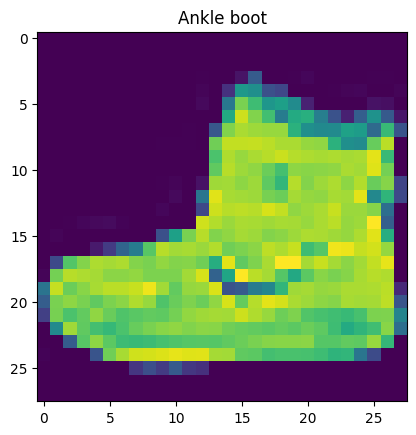

In [22]:
plt.imshow(image.squeeze())
plt.title(train_data.classes[label])
plt.show()

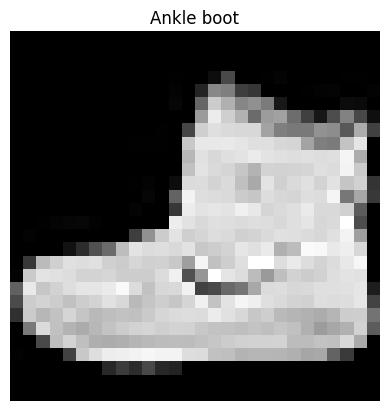

In [23]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
plt.show()

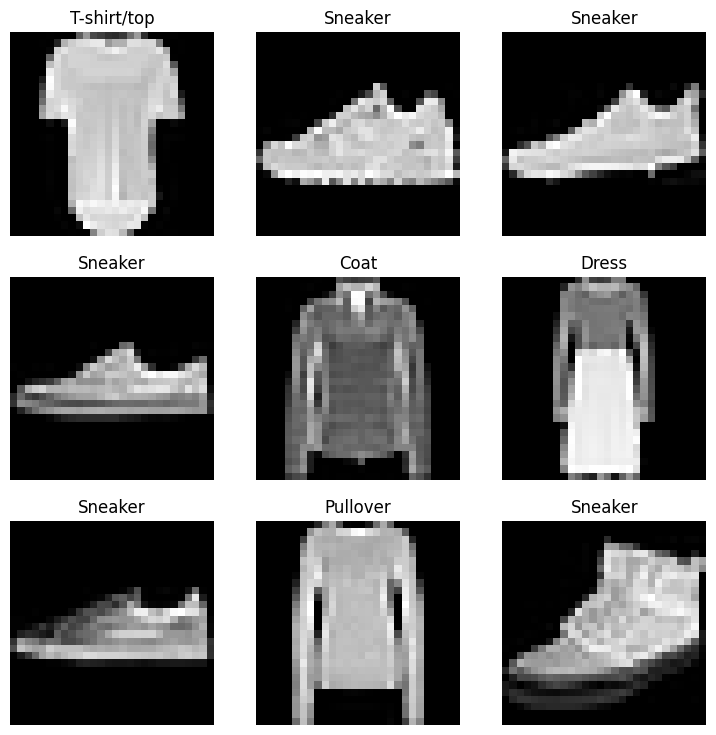

In [27]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(9):
    random_idx = torch.randint(0,len(train_data),(1,)).item()
    image, label = train_data[random_idx]
    fig.add_subplot(3,3,i+1)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(train_data.classes[label])
    plt.axis(False)
plt.show()